In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import datasets
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

#logistic regression
from sklearn.linear_model import LogisticRegression

#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#KNN
from sklearn.neighbors import KNeighborsClassifier

#Gaussian
from sklearn.naive_bayes import GaussianNB

#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Read Datasets
df = pd.read_csv("fifa20.csv")
pd.set_option('display.max_columns',None)
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [3]:
# df[df['team_position'] == 'SUB']

In [50]:
df_p = df.copy()
df.shape

(18278, 104)

In [51]:
df.team_position.unique()
# df_p[df_p['team_position'].isnull()]
# df_p['team_position'][327] = df_p['player_positions']

array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'SUB', 'LB', 'LS', 'RB', 'RDM', 'RES',
       'RAM', 'RS', 'RF', 'CM', 'CB', 'LF', 'LAM', nan, 'RWB', 'LWB'],
      dtype=object)

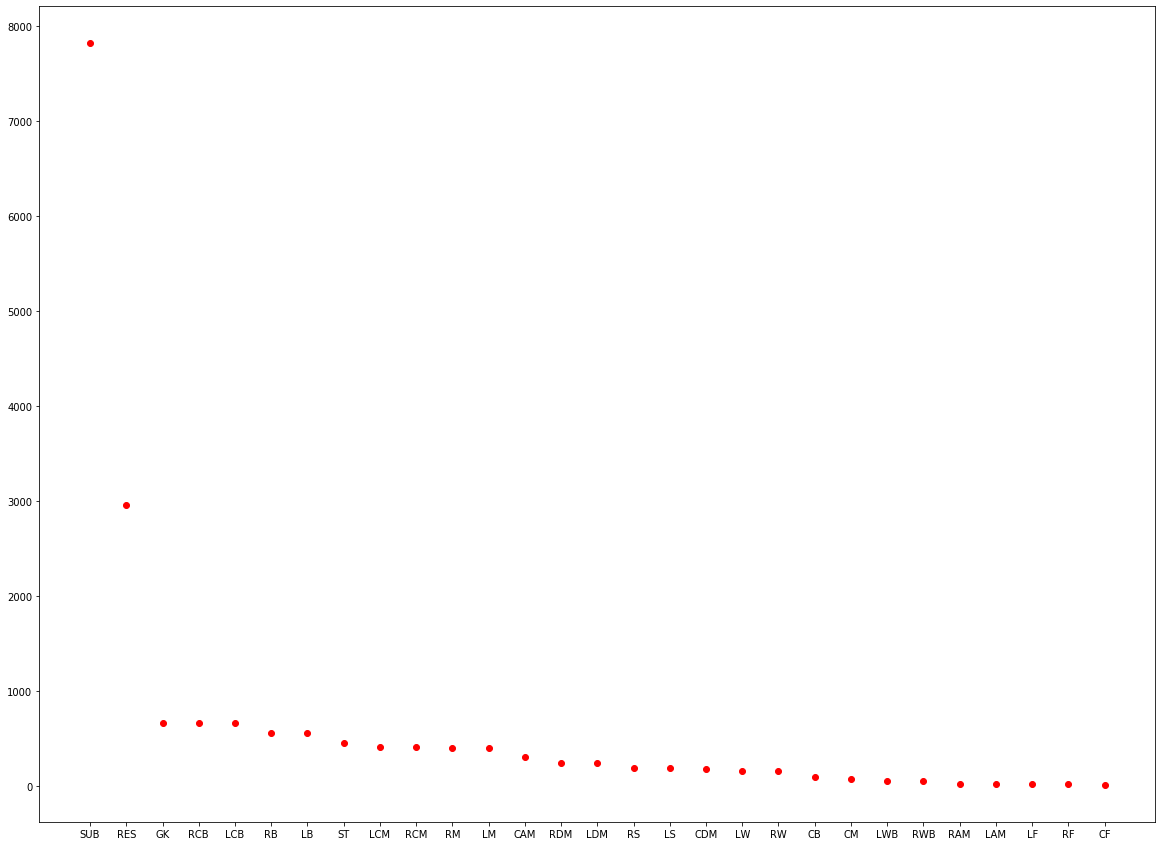

In [52]:
plt.figure(figsize=(20,15))
plt.plot(df_p.team_position.value_counts(), 'ro')

In [53]:
df_p = df_p.drop(df_p[df_p['team_position'] == 'SUB'].index)
df_p = df_p.drop(df_p[df_p['team_position'] == 'RES'].index)

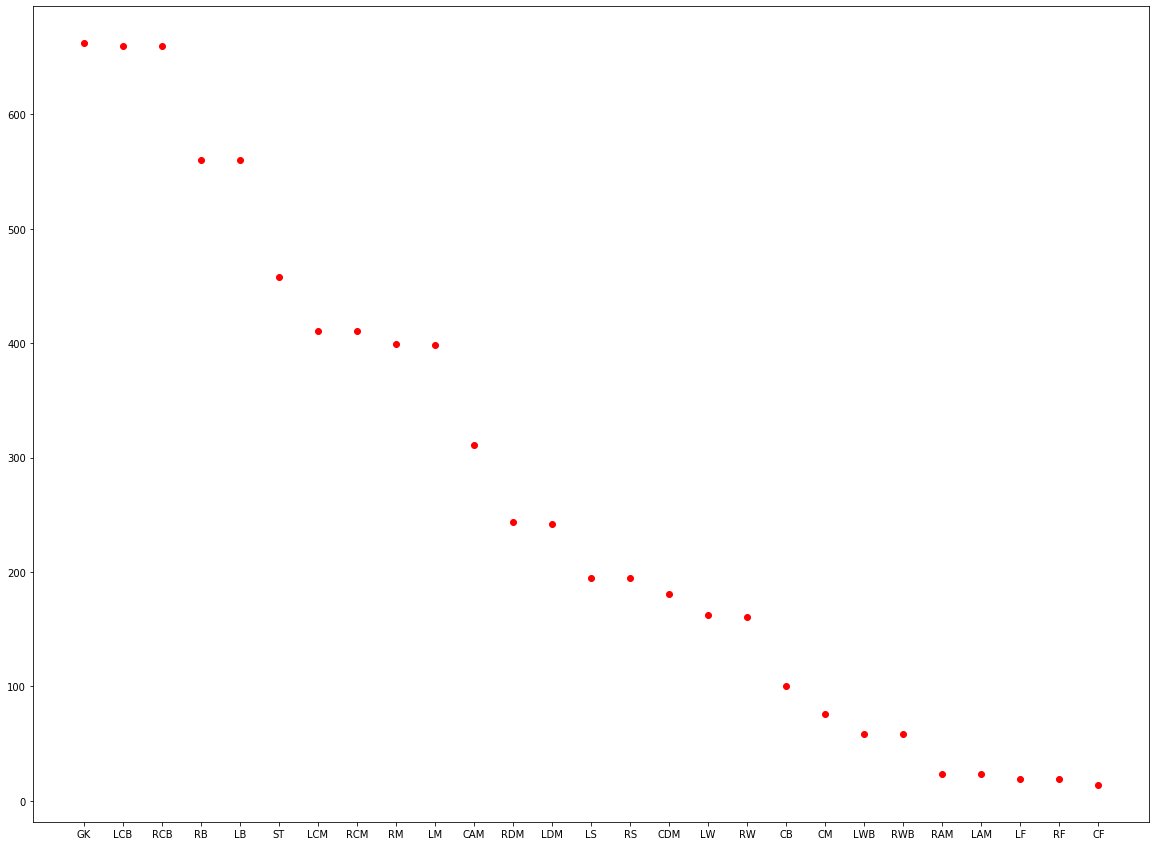

In [56]:
plt.figure(figsize=(20,15))
plt.plot(df_p.team_position.value_counts(), 'ro')

In [57]:
for col in df_p.columns:
    if df_p[col].isnull().sum() > 0:
        print(col, ' = ', df_p[col].isnull().sum())

release_clause_eur  =  679
player_tags  =  6595
team_position  =  240
team_jersey_number  =  240
loaned_from  =  7066
joined  =  674
contract_valid_until  =  240
nation_position  =  6659
nation_jersey_number  =  6659
pace  =  702
shooting  =  702
passing  =  702
dribbling  =  702
defending  =  702
physic  =  702
gk_diving  =  6798
gk_handling  =  6798
gk_kicking  =  6798
gk_reflexes  =  6798
gk_speed  =  6798
gk_positioning  =  6798
player_traits  =  3415
ls  =  702
st  =  702
rs  =  702
lw  =  702
lf  =  702
cf  =  702
rf  =  702
rw  =  702
lam  =  702
cam  =  702
ram  =  702
lm  =  702
lcm  =  702
cm  =  702
rcm  =  702
rm  =  702
lwb  =  702
ldm  =  702
cdm  =  702
rdm  =  702
rwb  =  702
lb  =  702
lcb  =  702
cb  =  702
rcb  =  702
rb  =  702


In [58]:
df_p.shape

(7500, 104)

In [59]:
null_col = [
    'team_position',
]
df_p = df_p.dropna(subset=null_col)

for col in df_p.columns:
    if df_p[col].isnull().sum() > 0:
        print(col, ' = ', df_p[col].isnull().sum())

release_clause_eur  =  439
player_tags  =  6378
loaned_from  =  6826
joined  =  434
nation_position  =  6659
nation_jersey_number  =  6659
pace  =  662
shooting  =  662
passing  =  662
dribbling  =  662
defending  =  662
physic  =  662
gk_diving  =  6598
gk_handling  =  6598
gk_kicking  =  6598
gk_reflexes  =  6598
gk_speed  =  6598
gk_positioning  =  6598
player_traits  =  3291
ls  =  662
st  =  662
rs  =  662
lw  =  662
lf  =  662
cf  =  662
rf  =  662
rw  =  662
lam  =  662
cam  =  662
ram  =  662
lm  =  662
lcm  =  662
cm  =  662
rcm  =  662
rm  =  662
lwb  =  662
ldm  =  662
cdm  =  662
rdm  =  662
rwb  =  662
lb  =  662
lcb  =  662
cb  =  662
rcb  =  662
rb  =  662


In [60]:
#Replace Null Value

coloumns = [
    'dribbling',
    'pace',
    'shooting',
    'passing',
    'defending',
    'physic',
    'gk_diving',
    'gk_handling',
    'gk_kicking',
    'gk_reflexes',
    'gk_speed',
    'gk_positioning',
]

str_columns = [
    'ls',
    'st',
    'rs',
    'lw',
    'lf',
    'cf',
    'rf',
    'rw',
    'lam',
    'cam',
    'ram',
    'lm',
    'lcm',
    'cm',
    'rcm',
    'rm',
    'lwb',
    'ldm',
    'cdm',
    'rdm',
    'rwb',
    'lb',
    'lcb',
    'cb',
    'rcb',
    'rb'
]

for col in coloumns:
    df_p.loc[df_p[col].isnull(), col] = 0
    
for col in str_columns:
    df_p.loc[df_p[col].isnull(), col] = '0'
    
for col in df_p.columns:
    if df_p[col].isnull().sum() > 0:
        print(col, ' = ', df_p[col].isnull().sum())

release_clause_eur  =  439
player_tags  =  6378
loaned_from  =  6826
joined  =  434
nation_position  =  6659
nation_jersey_number  =  6659
player_traits  =  3291


In [61]:
# delete feature

coloumns = [
    'value_eur',
    'wage_eur',
    'international_reputation',
    'dob',
    'sofifa_id',
    'player_url',
    'long_name',
    'nationality',
    'club',
    'player_positions',
    'body_type',
    'real_face',
    'team_jersey_number',
    'contract_valid_until',
    'release_clause_eur',
    'player_tags',
    'loaned_from',
    'joined',
    'nation_position',
    'nation_jersey_number',
    'player_traits',
    'ls',
    'st',
    'rs',
    'lw',
    'lf',
    'cf',
    'rf',
    'rw',
    'lam',
    'cam',
    'ram',
    'lm',
    'lcm',
    'cm',
    'rcm',
    'rm',
    'lwb',
    'ldm',
    'cdm',
    'rdm',
    'rwb',
    'lb',
    'lcb',
    'cb',
    'rcb',
    'rb',
]

for col in coloumns:
    df_p = df_p.drop(col, axis=1)

for col in df_p.columns:
    if df_p[col].isnull().sum() > 0:
        print(col, ' = ', df_p[col].isnull().sum())

In [62]:
df_p

,short_name,age,height_cm,weight_kg,overall,potential,preferred_foot,weak_foot,skill_moves,work_rate,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,Left,4,4,Medium/Low,RW,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,Right,4,5,High/Low,LW,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,Right,5,5,High/Medium,CAM,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,Right,3,1,Medium/Medium,GK,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,Right,4,4,High/Medium,LW,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18149,Yang Guoyuan,22,175,72,50,59,Right,2,2,Medium/Medium,RCM,63.0,41.0,52.0,53.0,41.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,42,38,42,60,38,51,44,35,53,51,60,65,63,50,74,49,79,37,75,38,40,24,41,53,48,55,52,41,41,15,12,6,5,12
18153,Yeljan Shinar,20,178,70,50,59,Right,3,2,Medium/Medium,RB,55.0,25.0,24.0,32.0,50.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,20,22,42,25,21,27,25,23,20,30,56,54,48,44,59,33,73,55,56,21,48,50,25,31,31,36,48,52,57,6,9,5,6,5
18155,M. Kouogun,22,184,81,50,58,Right,2,2,Medium/High,RCB,52.0,25.0,29.0,28.0,50.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,27,23,43,32,29,22,25,28,22,26,51,53,45,41,48,35,66,57,66,18,46,49,25,34,32,40,47,54,53,10,7,7,10,10
18182,J. White,17,188,72,49,69,Left,2,2,Medium/Medium,LB,66.0,24.0,29.0,48.0,48.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,33,24,43,25,23,53,30,32,29,35,69,64,63,54,42,20,59,62,50,23,54,45,39,32,35,37,46,50,55,6,7,6,13,9


In [63]:
b_fit = df_p.team_position.unique()

In [64]:
le = LabelEncoder()
df_p['preferred_foot'] = le.fit_transform(df_p['preferred_foot'])
df_p['work_rate'] = le.fit_transform(df_p['work_rate'])
# df_p['team_position'] = le.fit_transform(df_p['team_position'])

In [65]:
a_fit = df_p.team_position.unique()

In [66]:
klasifikasi_arr = [b_fit, a_fit]
i = 14
print(klasifikasi_arr[0][i], klasifikasi_arr[1][i])

LB LB


In [67]:
df_p

,short_name,age,height_cm,weight_kg,overall,potential,preferred_foot,weak_foot,skill_moves,work_rate,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,0,4,4,7,RW,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,1,4,5,1,LW,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,1,5,5,2,CAM,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,1,3,1,8,GK,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,1,4,4,2,LW,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18149,Yang Guoyuan,22,175,72,50,59,1,2,2,8,RCM,63.0,41.0,52.0,53.0,41.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,42,38,42,60,38,51,44,35,53,51,60,65,63,50,74,49,79,37,75,38,40,24,41,53,48,55,52,41,41,15,12,6,5,12
18153,Yeljan Shinar,20,178,70,50,59,1,3,2,8,RB,55.0,25.0,24.0,32.0,50.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,20,22,42,25,21,27,25,23,20,30,56,54,48,44,59,33,73,55,56,21,48,50,25,31,31,36,48,52,57,6,9,5,6,5
18155,M. Kouogun,22,184,81,50,58,1,2,2,6,RCB,52.0,25.0,29.0,28.0,50.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,27,23,43,32,29,22,25,28,22,26,51,53,45,41,48,35,66,57,66,18,46,49,25,34,32,40,47,54,53,10,7,7,10,10
18182,J. White,17,188,72,49,69,0,2,2,8,LB,66.0,24.0,29.0,48.0,48.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,33,24,43,25,23,53,30,32,29,35,69,64,63,54,42,20,59,62,50,23,54,45,39,32,35,37,46,50,55,6,7,6,13,9


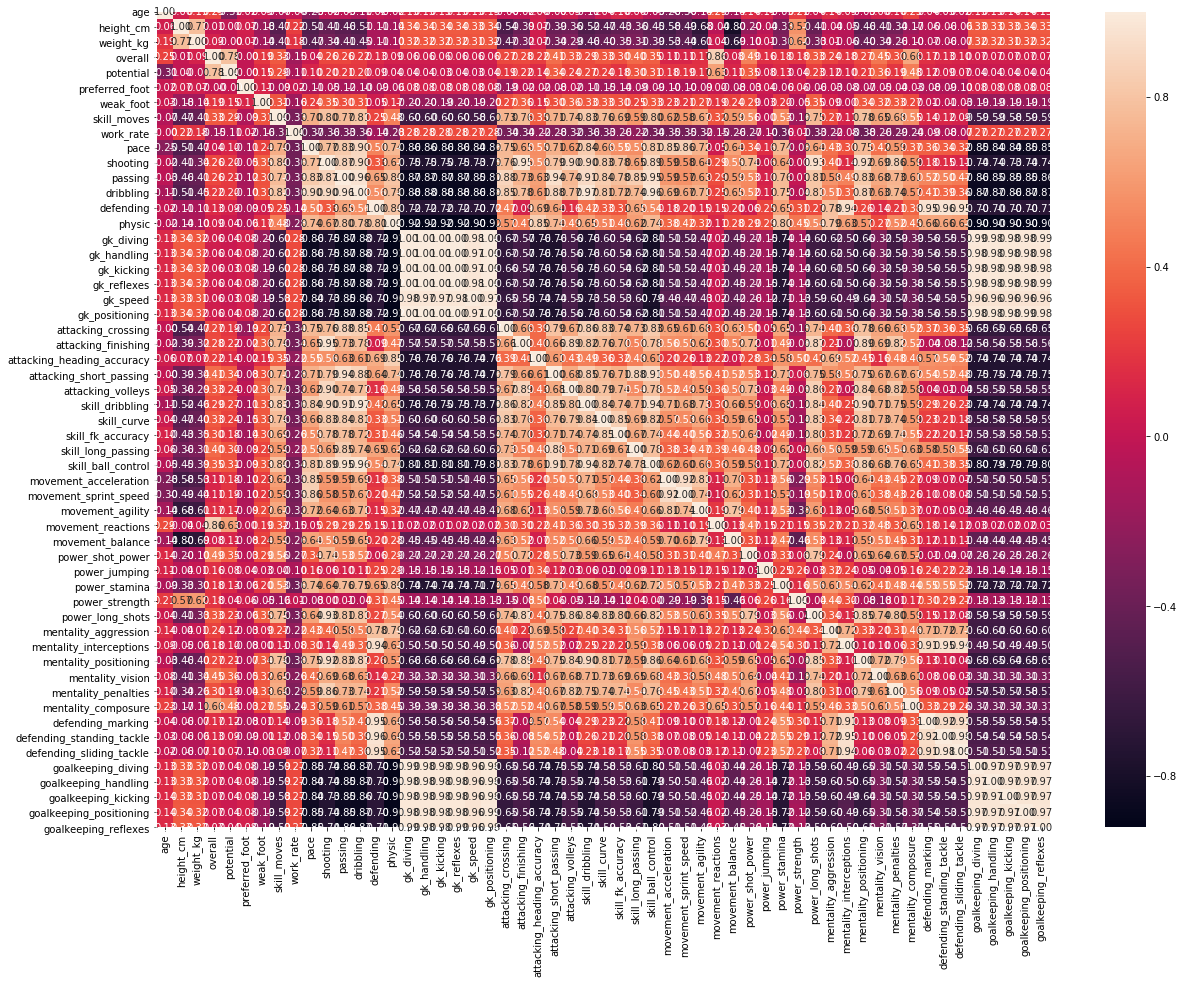

In [68]:
plt.figure(figsize=(20,15))
sns.heatmap(df_p.corr(), annot=True, fmt='.2f');

In [69]:
X_le = df_p.drop('team_position', axis=1)
X_le = X_le.drop('short_name', axis=1)
y = df_p['team_position']
X_train, X_test, y_train, y_test = train_test_split(X_le, y, test_size=0.25, random_state=0)

In [70]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [71]:
nr = NearMiss()
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel())

In [72]:
# Counter(y_train_miss)

In [74]:
# X_train_miss.shape

In [75]:
class Report:
    def __init__(self, X_test, y_test):
        self.X = X_test
        self.y = y_test
    
    def metrics(self, model):
        y_pred = model.predict(self.X)
        
        print('Accuracy score:\n')
        print(accuracy_score(self.y, y_pred))
        
        print('\nConfusion Matrix:\n')
        print(confusion_matrix(self.y, y_pred))
        
        print('\nClassification Report:\n')
        print(classification_report(self.y, y_pred))
    

In [76]:
report = Report(X_test, y_test)

In [77]:
dt = DecisionTreeClassifier(max_depth=20).fit(X_train, y_train)
report.metrics(dt)

Accuracy score:

0.34765840220385674

Confusion Matrix:

[[ 15   0   1   0   1   0   2   2   0   5   0   0  11   3   4   0   0   2
    0   8   0   0  10   1   2   0   3]
 [  0   1   1   0   1   0   0   0   6   0   1   0   0   0   0   0   0   3
    7   0   0   0   0   0   0   0   0]
 [  0   3   4   0   1   0   0   1   0   5   1   0   2   0   0   1   0   4
    2   9   4   0   1   0   0   1   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    0   1   0   0   1   1   0   0   1]
 [  0   0   4   0   0   0   0   0   0   8   0   0   0   0   0   0   0   0
    0   4   1   0   1   0   0   0   0]
 [  0   0   0   0   0 171   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   3   0   0   0
    0   0   0   0   2   1   0   0   0]
 [  3   3   0   0   1   0   0  94  14   8   1   0   7   0   1   5   0   5
    3   0   0   0   1   0   3   0   0]
 [  0  11   3   0   3   0   0  11  66  

In [85]:
rf = RandomForestClassifier().fit(X_train, y_train)
report.metrics(rf)

Accuracy score:

0.4534435261707989

Confusion Matrix:

[[ 19   0   0   0   0   0   0   3   1  13   1   0  16   1   0   0   0   1
    0   2   1   0  10   0   0   0   2]
 [  0   0   1   0   0   0   0   0   5   0   0   0   0   0   0   0   0   1
   12   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   2   3  10   4   0   0   0   0   0   0   1
    5   9   5   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   1   0   0   0   0   0   0   3]
 [  1   0   1   0   0   0   0   0   1   4   0   0   0   0   0   0   0   1
    0   8   2   0   0   0   0   0   0]
 [  0   0   0   0   0 171   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0
    0   0   0   0   1   0   0   0   1]
 [  0   0   0   0   0   0   0 125   4   3   0   0   1   0   0   0   0  10
    4   1   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0  12  65   

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
knn = KNeighborsClassifier().fit(X_train, y_train)
report.metrics(knn)

Accuracy score:

0.33663911845730027

Confusion Matrix:

[[ 20   1   1   0   0   0   0   2   0  11   0   1   9   3   0   0   0   0
    1   6   1   0   9   1   2   0   2]
 [  0   1   0   0   1   0   0   1   6   0   0   0   0   0   0   0   0   1
    8   2   0   0   0   0   0   0   0]
 [  3   0   7   0   4   0   0   0   6   8   3   0   0   0   0   0   0   1
    0   5   2   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   1   0   1   0   2]
 [  3   0   4   0   0   0   0   0   0   6   2   0   0   0   0   0   0   1
    0   1   1   0   0   0   0   0   0]
 [  0   0   0   0   0 171   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   1   0   0   0   0   0   2   0   0   0   0   0
    0   0   0   0   1   1   1   0   0]
 [  1   0   4   0   0   0   0  70   8   5   0   0   2   0   0   1   0  52
    1   3   1   0   1   0   0   0   0]
 [  0   5   6   0   1   0   0   8  74  

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
log = LogisticRegression().fit(X_train, y_train)
report.metrics(log)

Accuracy score:

0.4110192837465565

Confusion Matrix:

[[ 19   0   0   0   0   0   0   1   1   9   0   0  11   1   1   0   0   2
    0  10   0   0  11   1   0   0   3]
 [  0   1   0   0   0   0   0   0   7   1   0   0   0   0   0   0   0   1
    9   1   0   0   0   0   0   0   0]
 [  1   0   8   0   0   0   0   0   5   9   2   0   0   0   0   0   0   0
    2   6   6   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0   0   0   4]
 [  0   0   2   0   0   0   0   0   0   6   1   0   0   0   0   0   0   1
    0   6   2   0   0   0   0   0   0]
 [  0   0   0   0   0 171   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   1   1   0   0   0]
 [  0   0   1   0   0   0   0  65   5   0   0   0   1   0   0   0   0  64
    4   5   2   0   2   0   0   0   0]
 [  0   0   1   0   0   0   0   6  72   

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
y_pred = rf.predict(X_test)
hasil = [y_pred, y_test]
df_hasil = pd.DataFrame(hasil, index=['Predicted','Actual']) 
df_hasil

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021